In [2]:
import pandas as pd

dataset = pd.read_csv('iris.csv')

dataset.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
dataset.shape

(150, 5)

In [5]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.describe(include = 'all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Verificando se a base possui valores duplicados

In [8]:
dataset.duplicated().sum()

3

In [9]:
dataset[dataset.duplicated()]

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [11]:
x = dataset.iloc[:,0:4]
y = dataset.iloc[:,4]

In [12]:
x.head()


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

### Transformando valores categóricos em numéricos com o one Hot Encoding

In [18]:
y_dumies = pd.get_dummies(y)
y_dumies.head(10)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


### Método hold out para separar dados 

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_dumies, test_size=0.3, shuffle = True)

In [24]:
x_train.shape

(105, 4)

In [26]:
y_train.shape

(105, 3)

In [27]:
x_test.shape

(45, 4)

In [28]:
y_test.shape

(45, 3)

In [29]:
y_test.head(10)

,Iris-setosa,Iris-versicolor,Iris-virginica
18,1,0,0
10,1,0,0
139,0,0,1
47,1,0,0
11,1,0,0
31,1,0,0
50,0,1,0
117,0,0,1
108,0,0,1
26,1,0,0


### Definindo a arquitetura de rede

In [30]:
from keras.models import Sequential
from keras.layers import Dense

In [72]:
# numero_neuronios camadas ocultas  = numero_atributos + numero_saidas / 2

def nn_model():
    
    model = Sequential()
    model.add(Dense(units = 4, activation = 'relu', input_dim=4))
    model.add(Dense(units=4, activation = 'relu'))
    model.add(Dense(units=3, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    print(model.summary())
    
    return model

In [73]:
nn_multiclass = nn_model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 3)                 15        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
history = nn_multiclass.fit(x_train, y_train, batch_size=10, validation_split=0.1, epochs = 250)

Epoch 1/250
10/10 [==============================] - 0s 12ms/step - loss: 1.0661 - categorical_accuracy: 0.3191 - val_loss: 1.1240 - val_categorical_accuracy: 0.1818
Epoch 2/250
10/10 [==============================] - 0s 3ms/step - loss: 1.0447 - categorical_accuracy: 0.3191 - val_loss: 1.1002 - val_categorical_accuracy: 0.1818
Epoch 3/250
10/10 [==============================] - 0s 3ms/step - loss: 1.0251 - categorical_accuracy: 0.3191 - val_loss: 1.0781 - val_categorical_accuracy: 0.1818
Epoch 4/250
10/10 [==============================] - 0s 3ms/step - loss: 1.0052 - categorical_accuracy: 0.3191 - val_loss: 1.0594 - val_categorical_accuracy: 0.1818
Epoch 5/250
10/10 [==============================] - 0s 3ms/step - loss: 0.9881 - categorical_accuracy: 0.3298 - val_loss: 1.0437 - val_categorical_accuracy: 0.1818
Epoch 6/250
10/10 [==============================] - 0s 3ms/step - loss: 0.9705 - categorical_accuracy: 0.3298 - val_loss: 1.0269 - val_categorical_accuracy: 0.1818
Epoch 7/2

10/10 [==============================] - 0s 2ms/step - loss: 0.6380 - categorical_accuracy: 0.9681 - val_loss: 0.7446 - val_categorical_accuracy: 1.0000
Epoch 51/250
10/10 [==============================] - 0s 3ms/step - loss: 0.6346 - categorical_accuracy: 0.9468 - val_loss: 0.7399 - val_categorical_accuracy: 1.0000
Epoch 52/250
10/10 [==============================] - 0s 2ms/step - loss: 0.6305 - categorical_accuracy: 0.6809 - val_loss: 0.7363 - val_categorical_accuracy: 0.5455
Epoch 53/250
10/10 [==============================] - 0s 3ms/step - loss: 0.6269 - categorical_accuracy: 0.6383 - val_loss: 0.7324 - val_categorical_accuracy: 0.5455
Epoch 54/250
10/10 [==============================] - 0s 2ms/step - loss: 0.6233 - categorical_accuracy: 0.6383 - val_loss: 0.7279 - val_categorical_accuracy: 0.5455
Epoch 55/250
10/10 [==============================] - 0s 3ms/step - loss: 0.6194 - categorical_accuracy: 0.6383 - val_loss: 0.7237 - val_categorical_accuracy: 0.5455
Epoch 56/250
10/1

10/10 [==============================] - 0s 2ms/step - loss: 0.4474 - categorical_accuracy: 0.9043 - val_loss: 0.5136 - val_categorical_accuracy: 0.8182
Epoch 100/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4445 - categorical_accuracy: 0.9255 - val_loss: 0.5051 - val_categorical_accuracy: 0.9091
Epoch 101/250
10/10 [==============================] - 0s 2ms/step - loss: 0.4394 - categorical_accuracy: 0.9255 - val_loss: 0.5004 - val_categorical_accuracy: 0.9091
Epoch 102/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4360 - categorical_accuracy: 0.9149 - val_loss: 0.4972 - val_categorical_accuracy: 0.8182
Epoch 103/250
10/10 [==============================] - 0s 2ms/step - loss: 0.4321 - categorical_accuracy: 0.9255 - val_loss: 0.4924 - val_categorical_accuracy: 0.9091
Epoch 104/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4287 - categorical_accuracy: 0.9149 - val_loss: 0.4890 - val_categorical_accuracy: 0.8182
Epoch 105/25

10/10 [==============================] - 0s 3ms/step - loss: 0.3026 - categorical_accuracy: 0.9255 - val_loss: 0.3200 - val_categorical_accuracy: 1.0000
Epoch 149/250
10/10 [==============================] - 0s 2ms/step - loss: 0.3003 - categorical_accuracy: 0.9362 - val_loss: 0.3180 - val_categorical_accuracy: 1.0000
Epoch 150/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2987 - categorical_accuracy: 0.9255 - val_loss: 0.3143 - val_categorical_accuracy: 1.0000
Epoch 151/250
10/10 [==============================] - 0s 2ms/step - loss: 0.2969 - categorical_accuracy: 0.9468 - val_loss: 0.3102 - val_categorical_accuracy: 1.0000
Epoch 152/250
10/10 [==============================] - 0s 2ms/step - loss: 0.2935 - categorical_accuracy: 0.9362 - val_loss: 0.3096 - val_categorical_accuracy: 1.0000
Epoch 153/250
10/10 [==============================] - 0s 2ms/step - loss: 0.2917 - categorical_accuracy: 0.9255 - val_loss: 0.3109 - val_categorical_accuracy: 1.0000
Epoch 154/25

10/10 [==============================] - 0s 2ms/step - loss: 0.2177 - categorical_accuracy: 0.9468 - val_loss: 0.2011 - val_categorical_accuracy: 1.0000
Epoch 198/250
10/10 [==============================] - 0s 2ms/step - loss: 0.2166 - categorical_accuracy: 0.9468 - val_loss: 0.2003 - val_categorical_accuracy: 1.0000
Epoch 199/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2157 - categorical_accuracy: 0.9468 - val_loss: 0.1989 - val_categorical_accuracy: 1.0000
Epoch 200/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2136 - categorical_accuracy: 0.9468 - val_loss: 0.1979 - val_categorical_accuracy: 1.0000
Epoch 201/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2127 - categorical_accuracy: 0.9468 - val_loss: 0.1961 - val_categorical_accuracy: 1.0000
Epoch 202/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2112 - categorical_accuracy: 0.9468 - val_loss: 0.1977 - val_categorical_accuracy: 1.0000
Epoch 203/25

10/10 [==============================] - 0s 3ms/step - loss: 0.1714 - categorical_accuracy: 0.9468 - val_loss: 0.1427 - val_categorical_accuracy: 1.0000
Epoch 247/250
10/10 [==============================] - 0s 2ms/step - loss: 0.1703 - categorical_accuracy: 0.9681 - val_loss: 0.1313 - val_categorical_accuracy: 1.0000
Epoch 248/250
10/10 [==============================] - 0s 2ms/step - loss: 0.1693 - categorical_accuracy: 0.9681 - val_loss: 0.1313 - val_categorical_accuracy: 1.0000
Epoch 249/250
10/10 [==============================] - 0s 2ms/step - loss: 0.1674 - categorical_accuracy: 0.9681 - val_loss: 0.1320 - val_categorical_accuracy: 1.0000
Epoch 250/250
10/10 [==============================] - 0s 2ms/step - loss: 0.1657 - categorical_accuracy: 0.9681 - val_loss: 0.1346 - val_categorical_accuracy: 1.0000


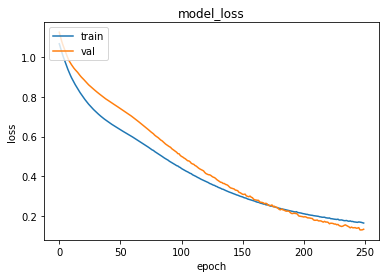

In [75]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [76]:
y_pred = nn_multiclass.predict(x_test)

y_pred

array([[9.9958307e-01, 4.1699290e-04, 8.8592616e-16],
       [9.9975497e-01, 2.4508004e-04, 3.9706414e-16],
       [1.9854818e-02, 2.4327107e-01, 7.3687416e-01],
       [9.9881929e-01, 1.1806334e-03, 1.5189026e-13],
       [9.9917525e-01, 8.2472770e-04, 5.1204531e-14],
       [9.9796778e-01, 2.0322013e-03, 6.9965877e-14],
       [6.2335460e-03, 9.8944676e-01, 4.3196878e-03],
       [1.9347463e-02, 1.7620549e-01, 8.0444705e-01],
       [2.2232320e-02, 1.5620975e-01, 8.2155794e-01],
       [9.9796426e-01, 2.0356984e-03, 2.6965214e-13],
       [1.9815536e-02, 2.3264024e-01, 7.4754423e-01],
       [9.9978644e-01, 2.1355112e-04, 5.4446473e-16],
       [2.2232320e-02, 1.5620975e-01, 8.2155794e-01],
       [2.1804757e-02, 4.6979102e-01, 5.0840425e-01],
       [9.9958986e-01, 4.1014791e-04, 2.7529951e-15],
       [1.3681164e-02, 9.4532150e-01, 4.0997341e-02],
       [9.9926609e-01, 7.3393789e-04, 4.9568649e-14],
       [1.4464648e-02, 9.3697274e-01, 4.8562650e-02],
       [8.7173218e-03, 9.801

In [77]:
import numpy as np

y_pred_labels = [np.argmax(t) for t in y_pred]
y_test_labels = [np.argmax(t) for t in y_test.iloc[:,0:3].values]


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_test_labels, y_pred_labels)

print(f'acc: {acc}')

nn_multiclass.evaluate(x_test, y_test)

acc: 0.9777777777777777
2/2 [==============================] - 0s 1ms/step - loss: 0.1177 - categorical_accuracy: 0.9778


[0.11772143095731735, 0.9777777791023254]

In [79]:
y_test.iloc[:,0:3].values

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

### MATRIZ DE CONFUSÃO

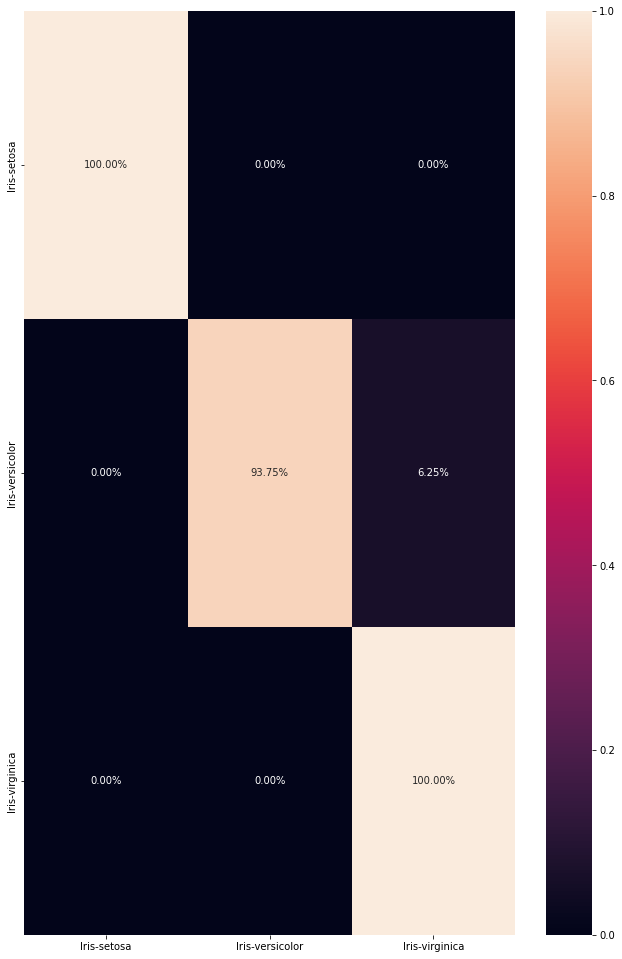

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_labels, y_pred_labels)

target_names = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig2, ax2 = plt.subplots(figsize=(11,17))

fig2 = sns.heatmap(cmn, annot=True, fmt='.2%', xticklabels=target_names, yticklabels=target_names)

### Validação cruzada

In [83]:
from keras.wrappers.scikit_learn import KerasClassifier

In [88]:
nn_multiclass_crossvalidation = KerasClassifier(build_fn=nn_model, epochs=250, batch_size=10)

<ipython-input-88-b4a0b9316702>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_multiclass_crossvalidation = KerasClassifier(build_fn=nn_model, epochs=250, batch_size=10)


In [90]:
from sklearn.model_selection import cross_val_score

resultado = cross_val_score(estimator=nn_multiclass_crossvalidation, X=x, y=y, cv=10, scoring='accuracy')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 3)                 15        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
14/14 [==============================] - 0s 2ms/step - loss: 4.6949 - categorical_accuracy: 0.3704
Epoch 2/250
14/14 [==============================] - 0s 1ms/step - loss: 4.1701 - categorical_accuracy: 0.3704
Epoch 3/250
14/14 [==============================] - 0s 1ms/step - loss: 3.6612 - categorical_a

14/14 [==============================] - 0s 865us/step - loss: 0.8370 - categorical_accuracy: 0.6519
Epoch 66/250
14/14 [==============================] - 0s 899us/step - loss: 0.8333 - categorical_accuracy: 0.6519
Epoch 67/250
14/14 [==============================] - 0s 708us/step - loss: 0.8289 - categorical_accuracy: 0.6148
Epoch 68/250
14/14 [==============================] - 0s 763us/step - loss: 0.8239 - categorical_accuracy: 0.6000
Epoch 69/250
14/14 [==============================] - 0s 825us/step - loss: 0.8195 - categorical_accuracy: 0.6000
Epoch 70/250
14/14 [==============================] - 0s 835us/step - loss: 0.8160 - categorical_accuracy: 0.6593
Epoch 71/250
14/14 [==============================] - 0s 877us/step - loss: 0.8100 - categorical_accuracy: 0.6519
Epoch 72/250
14/14 [==============================] - 0s 736us/step - loss: 0.8055 - categorical_accuracy: 0.6148
Epoch 73/250
14/14 [==============================] - 0s 840us/step - loss: 0.7997 - categorical_accu

14/14 [==============================] - 0s 667us/step - loss: 0.4264 - categorical_accuracy: 0.9630
Epoch 137/250
14/14 [==============================] - 0s 801us/step - loss: 0.4197 - categorical_accuracy: 0.9630
Epoch 138/250
14/14 [==============================] - 0s 774us/step - loss: 0.4131 - categorical_accuracy: 0.9556
Epoch 139/250
14/14 [==============================] - 0s 731us/step - loss: 0.4067 - categorical_accuracy: 0.9630
Epoch 140/250
14/14 [==============================] - 0s 713us/step - loss: 0.4001 - categorical_accuracy: 0.9704
Epoch 141/250
14/14 [==============================] - 0s 776us/step - loss: 0.3922 - categorical_accuracy: 0.9704
Epoch 142/250
14/14 [==============================] - 0s 812us/step - loss: 0.3852 - categorical_accuracy: 0.9630
Epoch 143/250
14/14 [==============================] - 0s 689us/step - loss: 0.3789 - categorical_accuracy: 0.9556
Epoch 144/250
14/14 [==============================] - 0s 766us/step - loss: 0.3712 - categori

14/14 [==============================] - 0s 723us/step - loss: 0.1540 - categorical_accuracy: 0.9778
Epoch 208/250
14/14 [==============================] - 0s 791us/step - loss: 0.1528 - categorical_accuracy: 0.9778
Epoch 209/250
14/14 [==============================] - 0s 825us/step - loss: 0.1517 - categorical_accuracy: 0.9778
Epoch 210/250
14/14 [==============================] - 0s 781us/step - loss: 0.1499 - categorical_accuracy: 0.9778
Epoch 211/250
14/14 [==============================] - 0s 698us/step - loss: 0.1490 - categorical_accuracy: 0.9704
Epoch 212/250
14/14 [==============================] - 0s 821us/step - loss: 0.1475 - categorical_accuracy: 0.9778
Epoch 213/250
14/14 [==============================] - 0s 827us/step - loss: 0.1489 - categorical_accuracy: 0.9704
Epoch 214/250
14/14 [==============================] - 0s 795us/step - loss: 0.1469 - categorical_accuracy: 0.9778
Epoch 215/250
14/14 [==============================] - 0s 734us/step - loss: 0.1440 - categori

14/14 [==============================] - 0s 777us/step - loss: 0.9463 - categorical_accuracy: 0.2148
Epoch 22/250
14/14 [==============================] - 0s 710us/step - loss: 0.9400 - categorical_accuracy: 0.2519
Epoch 23/250
14/14 [==============================] - 0s 902us/step - loss: 0.9365 - categorical_accuracy: 0.2000
Epoch 24/250
14/14 [==============================] - 0s 843us/step - loss: 0.9318 - categorical_accuracy: 0.2222
Epoch 25/250
14/14 [==============================] - 0s 855us/step - loss: 0.9268 - categorical_accuracy: 0.2444
Epoch 26/250
14/14 [==============================] - 0s 764us/step - loss: 0.9233 - categorical_accuracy: 0.2815
Epoch 27/250
14/14 [==============================] - 0s 695us/step - loss: 0.9192 - categorical_accuracy: 0.2296
Epoch 28/250
14/14 [==============================] - 0s 798us/step - loss: 0.9115 - categorical_accuracy: 0.2222
Epoch 29/250
14/14 [==============================] - 0s 780us/step - loss: 0.9068 - categorical_accu

Epoch 93/250
14/14 [==============================] - 0s 751us/step - loss: 0.5544 - categorical_accuracy: 0.6296
Epoch 94/250
14/14 [==============================] - 0s 846us/step - loss: 0.5513 - categorical_accuracy: 0.6296
Epoch 95/250
14/14 [==============================] - 0s 849us/step - loss: 0.5491 - categorical_accuracy: 0.6222
Epoch 96/250
14/14 [==============================] - 0s 817us/step - loss: 0.5469 - categorical_accuracy: 0.6222
Epoch 97/250
14/14 [==============================] - 0s 738us/step - loss: 0.5477 - categorical_accuracy: 0.6296
Epoch 98/250
14/14 [==============================] - 0s 728us/step - loss: 0.5453 - categorical_accuracy: 0.6296
Epoch 99/250
14/14 [==============================] - 0s 885us/step - loss: 0.5415 - categorical_accuracy: 0.6444
Epoch 100/250
14/14 [==============================] - 0s 873us/step - loss: 0.5389 - categorical_accuracy: 0.6444
Epoch 101/250
14/14 [==============================] - 0s 939us/step - loss: 0.5371 - c

14/14 [==============================] - 0s 877us/step - loss: 0.4532 - categorical_accuracy: 0.7630
Epoch 165/250
14/14 [==============================] - 0s 854us/step - loss: 0.4523 - categorical_accuracy: 0.7704
Epoch 166/250
14/14 [==============================] - 0s 920us/step - loss: 0.4516 - categorical_accuracy: 0.8148
Epoch 167/250
14/14 [==============================] - 0s 845us/step - loss: 0.4512 - categorical_accuracy: 0.7778
Epoch 168/250
14/14 [==============================] - 0s 763us/step - loss: 0.4486 - categorical_accuracy: 0.7852
Epoch 169/250
14/14 [==============================] - 0s 860us/step - loss: 0.4481 - categorical_accuracy: 0.8000
Epoch 170/250
14/14 [==============================] - 0s 866us/step - loss: 0.4472 - categorical_accuracy: 0.8370
Epoch 171/250
14/14 [==============================] - 0s 891us/step - loss: 0.4465 - categorical_accuracy: 0.8000
Epoch 172/250
14/14 [==============================] - 0s 881us/step - loss: 0.4441 - categori

14/14 [==============================] - 0s 782us/step - loss: 0.3459 - categorical_accuracy: 0.9630
Epoch 236/250
14/14 [==============================] - 0s 711us/step - loss: 0.3433 - categorical_accuracy: 0.9630
Epoch 237/250
14/14 [==============================] - 0s 874us/step - loss: 0.3399 - categorical_accuracy: 0.9630
Epoch 238/250
14/14 [==============================] - 0s 788us/step - loss: 0.3373 - categorical_accuracy: 0.9630
Epoch 239/250
14/14 [==============================] - 0s 805us/step - loss: 0.3354 - categorical_accuracy: 0.9630
Epoch 240/250
14/14 [==============================] - 0s 733us/step - loss: 0.3322 - categorical_accuracy: 0.9630
Epoch 241/250
14/14 [==============================] - 0s 767us/step - loss: 0.3301 - categorical_accuracy: 0.9630
Epoch 242/250
14/14 [==============================] - 0s 894us/step - loss: 0.3282 - categorical_accuracy: 0.9630
Epoch 243/250
14/14 [==============================] - 0s 853us/step - loss: 0.3245 - categori

14/14 [==============================] - 0s 827us/step - loss: 0.3877 - categorical_accuracy: 0.8889
Epoch 50/250
14/14 [==============================] - 0s 881us/step - loss: 0.3822 - categorical_accuracy: 0.9037
Epoch 51/250
14/14 [==============================] - 0s 817us/step - loss: 0.3773 - categorical_accuracy: 0.9185
Epoch 52/250
14/14 [==============================] - 0s 697us/step - loss: 0.3722 - categorical_accuracy: 0.9259
Epoch 53/250
14/14 [==============================] - 0s 743us/step - loss: 0.3673 - categorical_accuracy: 0.9333
Epoch 54/250
14/14 [==============================] - 0s 794us/step - loss: 0.3636 - categorical_accuracy: 0.8963
Epoch 55/250
14/14 [==============================] - 0s 798us/step - loss: 0.3577 - categorical_accuracy: 0.9407
Epoch 56/250
14/14 [==============================] - 0s 722us/step - loss: 0.3529 - categorical_accuracy: 0.9407
Epoch 57/250
14/14 [==============================] - 0s 776us/step - loss: 0.3488 - categorical_accu

14/14 [==============================] - 0s 736us/step - loss: 0.1595 - categorical_accuracy: 0.9778
Epoch 121/250
14/14 [==============================] - 0s 802us/step - loss: 0.1576 - categorical_accuracy: 0.9778
Epoch 122/250
14/14 [==============================] - 0s 740us/step - loss: 0.1551 - categorical_accuracy: 0.9778
Epoch 123/250
14/14 [==============================] - 0s 730us/step - loss: 0.1542 - categorical_accuracy: 0.9704
Epoch 124/250
14/14 [==============================] - 0s 850us/step - loss: 0.1529 - categorical_accuracy: 0.9778
Epoch 125/250
14/14 [==============================] - 0s 813us/step - loss: 0.1525 - categorical_accuracy: 0.9778
Epoch 126/250
14/14 [==============================] - 0s 793us/step - loss: 0.1506 - categorical_accuracy: 0.9704
Epoch 127/250
14/14 [==============================] - 0s 759us/step - loss: 0.1484 - categorical_accuracy: 0.9778
Epoch 128/250
14/14 [==============================] - 0s 758us/step - loss: 0.1491 - categori

14/14 [==============================] - 0s 710us/step - loss: 0.0994 - categorical_accuracy: 0.9778
Epoch 192/250
14/14 [==============================] - 0s 810us/step - loss: 0.0962 - categorical_accuracy: 0.9778
Epoch 193/250
14/14 [==============================] - 0s 781us/step - loss: 0.1007 - categorical_accuracy: 0.9778
Epoch 194/250
14/14 [==============================] - 0s 831us/step - loss: 0.0962 - categorical_accuracy: 0.9704
Epoch 195/250
14/14 [==============================] - 0s 672us/step - loss: 0.0971 - categorical_accuracy: 0.9778
Epoch 196/250
14/14 [==============================] - 0s 785us/step - loss: 0.0941 - categorical_accuracy: 0.9704
Epoch 197/250
14/14 [==============================] - 0s 778us/step - loss: 0.0945 - categorical_accuracy: 0.9778
Epoch 198/250
14/14 [==============================] - 0s 769us/step - loss: 0.0946 - categorical_accuracy: 0.9704
Epoch 199/250
14/14 [==============================] - 0s 695us/step - loss: 0.0932 - categori

Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
14/14 [==============================] - 0s 762us/step - loss: 1.0900 - categorical_accuracy: 0.3704
Epoch 2/250
14/14 [==============================] - 0s 741us/step - loss: 1.0763 - categorical_accuracy: 0.3704
Epoch 3/250
14/14 [==============================] - 0s 762us/step - loss: 1.0648 - categorical_accuracy: 0.3704
Epoch 4/250
14/14 [==============================] - 0s 821us/step - loss: 1.0554 - categorical_accuracy: 0.3704
Epoch 5/250
14/14 [==============================] - 0s 794us/step - loss: 1.0469 - categorical_accuracy: 0.3704
Epoch 6/250
14/14 [==============================] - 0s 740us/step - loss: 1.0399 - categorical_accuracy: 0.3704
Epoch 7/250
14/14 [==============================] - 0s 747us/step - loss: 1.0327 - categorical_accuracy: 0.3704
Epoch 8/250
14/14 [==============================] - 0s 860us/step - loss: 1

14/14 [==============================] - 0s 719us/step - loss: 0.5858 - categorical_accuracy: 0.7037
Epoch 72/250
14/14 [==============================] - 0s 755us/step - loss: 0.5832 - categorical_accuracy: 0.7037
Epoch 73/250
14/14 [==============================] - 0s 820us/step - loss: 0.5813 - categorical_accuracy: 0.7037
Epoch 74/250
14/14 [==============================] - 0s 776us/step - loss: 0.5792 - categorical_accuracy: 0.7037
Epoch 75/250
14/14 [==============================] - 0s 685us/step - loss: 0.5758 - categorical_accuracy: 0.7037
Epoch 76/250
14/14 [==============================] - 0s 760us/step - loss: 0.5737 - categorical_accuracy: 0.7037
Epoch 77/250
14/14 [==============================] - 0s 782us/step - loss: 0.5714 - categorical_accuracy: 0.7037
Epoch 78/250
14/14 [==============================] - 0s 740us/step - loss: 0.5683 - categorical_accuracy: 0.7037
Epoch 79/250
14/14 [==============================] - 0s 685us/step - loss: 0.5658 - categorical_accu

14/14 [==============================] - 0s 751us/step - loss: 0.4491 - categorical_accuracy: 0.7481
Epoch 143/250
14/14 [==============================] - 0s 719us/step - loss: 0.4476 - categorical_accuracy: 0.7630
Epoch 144/250
14/14 [==============================] - 0s 830us/step - loss: 0.4461 - categorical_accuracy: 0.7778
Epoch 145/250
14/14 [==============================] - 0s 831us/step - loss: 0.4445 - categorical_accuracy: 0.7778
Epoch 146/250
14/14 [==============================] - 0s 776us/step - loss: 0.4430 - categorical_accuracy: 0.7778
Epoch 147/250
14/14 [==============================] - 0s 766us/step - loss: 0.4422 - categorical_accuracy: 0.7778
Epoch 148/250
14/14 [==============================] - 0s 661us/step - loss: 0.4401 - categorical_accuracy: 0.7852
Epoch 149/250
14/14 [==============================] - 0s 774us/step - loss: 0.4383 - categorical_accuracy: 0.7778
Epoch 150/250
14/14 [==============================] - 0s 783us/step - loss: 0.4368 - categori

14/14 [==============================] - 0s 749us/step - loss: 0.3453 - categorical_accuracy: 0.8815
Epoch 214/250
14/14 [==============================] - 0s 809us/step - loss: 0.3444 - categorical_accuracy: 0.8889
Epoch 215/250
14/14 [==============================] - 0s 836us/step - loss: 0.3431 - categorical_accuracy: 0.8815
Epoch 216/250
14/14 [==============================] - 0s 700us/step - loss: 0.3416 - categorical_accuracy: 0.8815
Epoch 217/250
14/14 [==============================] - 0s 758us/step - loss: 0.3405 - categorical_accuracy: 0.8815
Epoch 218/250
14/14 [==============================] - 0s 790us/step - loss: 0.3396 - categorical_accuracy: 0.8889
Epoch 219/250
14/14 [==============================] - 0s 816us/step - loss: 0.3392 - categorical_accuracy: 0.8889
Epoch 220/250
14/14 [==============================] - 0s 697us/step - loss: 0.3389 - categorical_accuracy: 0.8815
Epoch 221/250
14/14 [==============================] - 0s 735us/step - loss: 0.3356 - categori

Epoch 21/250
14/14 [==============================] - 0s 945us/step - loss: 0.8684 - categorical_accuracy: 0.7407
Epoch 22/250
14/14 [==============================] - 0s 805us/step - loss: 0.8532 - categorical_accuracy: 0.7407
Epoch 23/250
14/14 [==============================] - 0s 825us/step - loss: 0.8395 - categorical_accuracy: 0.7407
Epoch 24/250
14/14 [==============================] - 0s 769us/step - loss: 0.8255 - categorical_accuracy: 0.7407
Epoch 25/250
14/14 [==============================] - 0s 801us/step - loss: 0.8115 - categorical_accuracy: 0.7407
Epoch 26/250
14/14 [==============================] - 0s 821us/step - loss: 0.7992 - categorical_accuracy: 0.7407
Epoch 27/250
14/14 [==============================] - 0s 775us/step - loss: 0.7864 - categorical_accuracy: 0.7407
Epoch 28/250
14/14 [==============================] - 0s 719us/step - loss: 0.7751 - categorical_accuracy: 0.7407
Epoch 29/250
14/14 [==============================] - 0s 795us/step - loss: 0.7643 - cat

14/14 [==============================] - 0s 784us/step - loss: 0.2563 - categorical_accuracy: 0.9778
Epoch 93/250
14/14 [==============================] - 0s 853us/step - loss: 0.2509 - categorical_accuracy: 0.9778
Epoch 94/250
14/14 [==============================] - 0s 731us/step - loss: 0.2443 - categorical_accuracy: 0.9778
Epoch 95/250
14/14 [==============================] - 0s 756us/step - loss: 0.2395 - categorical_accuracy: 0.9778
Epoch 96/250
14/14 [==============================] - 0s 850us/step - loss: 0.2333 - categorical_accuracy: 0.9778
Epoch 97/250
14/14 [==============================] - 0s 782us/step - loss: 0.2287 - categorical_accuracy: 0.9778
Epoch 98/250
14/14 [==============================] - 0s 755us/step - loss: 0.2235 - categorical_accuracy: 0.9778
Epoch 99/250
14/14 [==============================] - 0s 760us/step - loss: 0.2191 - categorical_accuracy: 0.9778
Epoch 100/250
14/14 [==============================] - 0s 799us/step - loss: 0.2143 - categorical_acc

14/14 [==============================] - 0s 708us/step - loss: 0.0868 - categorical_accuracy: 0.9926
Epoch 164/250
14/14 [==============================] - 0s 749us/step - loss: 0.0894 - categorical_accuracy: 0.9926
Epoch 165/250
14/14 [==============================] - 0s 838us/step - loss: 0.0858 - categorical_accuracy: 0.9926
Epoch 166/250
14/14 [==============================] - 0s 791us/step - loss: 0.0858 - categorical_accuracy: 0.9926
Epoch 167/250
14/14 [==============================] - 0s 756us/step - loss: 0.0875 - categorical_accuracy: 0.9926
Epoch 168/250
14/14 [==============================] - 0s 692us/step - loss: 0.0832 - categorical_accuracy: 0.9926
Epoch 169/250
14/14 [==============================] - 0s 772us/step - loss: 0.0871 - categorical_accuracy: 0.9926
Epoch 170/250
14/14 [==============================] - 0s 786us/step - loss: 0.0822 - categorical_accuracy: 0.9926
Epoch 171/250
14/14 [==============================] - 0s 704us/step - loss: 0.0824 - categori

14/14 [==============================] - 0s 700us/step - loss: 0.0610 - categorical_accuracy: 0.9926
Epoch 235/250
14/14 [==============================] - 0s 755us/step - loss: 0.0614 - categorical_accuracy: 0.9926
Epoch 236/250
14/14 [==============================] - 0s 878us/step - loss: 0.0605 - categorical_accuracy: 0.9926
Epoch 237/250
14/14 [==============================] - 0s 777us/step - loss: 0.0602 - categorical_accuracy: 0.9926
Epoch 238/250
14/14 [==============================] - 0s 726us/step - loss: 0.0609 - categorical_accuracy: 0.9926
Epoch 239/250
14/14 [==============================] - 0s 764us/step - loss: 0.0599 - categorical_accuracy: 0.9926
Epoch 240/250
14/14 [==============================] - 0s 777us/step - loss: 0.0602 - categorical_accuracy: 0.9926
Epoch 241/250
14/14 [==============================] - 0s 794us/step - loss: 0.0600 - categorical_accuracy: 0.9926
Epoch 242/250
14/14 [==============================] - 0s 712us/step - loss: 0.0586 - categori

14/14 [==============================] - 0s 785us/step - loss: 0.2011 - categorical_accuracy: 0.9630
Epoch 49/250
14/14 [==============================] - 0s 694us/step - loss: 0.1968 - categorical_accuracy: 0.9704
Epoch 50/250
14/14 [==============================] - 0s 773us/step - loss: 0.1928 - categorical_accuracy: 0.9778
Epoch 51/250
14/14 [==============================] - 0s 801us/step - loss: 0.1912 - categorical_accuracy: 0.9778
Epoch 52/250
14/14 [==============================] - 0s 820us/step - loss: 0.1851 - categorical_accuracy: 0.9704
Epoch 53/250
14/14 [==============================] - 0s 702us/step - loss: 0.1865 - categorical_accuracy: 0.9556
Epoch 54/250
14/14 [==============================] - 0s 749us/step - loss: 0.1779 - categorical_accuracy: 0.9704
Epoch 55/250
14/14 [==============================] - 0s 812us/step - loss: 0.1780 - categorical_accuracy: 0.9778
Epoch 56/250
14/14 [==============================] - 0s 832us/step - loss: 0.1738 - categorical_accu

14/14 [==============================] - 0s 844us/step - loss: 0.0918 - categorical_accuracy: 0.9778
Epoch 120/250
14/14 [==============================] - 0s 842us/step - loss: 0.0905 - categorical_accuracy: 0.9852
Epoch 121/250
14/14 [==============================] - 0s 781us/step - loss: 0.0935 - categorical_accuracy: 0.9704
Epoch 122/250
14/14 [==============================] - 0s 711us/step - loss: 0.0879 - categorical_accuracy: 0.9704
Epoch 123/250
14/14 [==============================] - 0s 754us/step - loss: 0.0894 - categorical_accuracy: 0.9778
Epoch 124/250
14/14 [==============================] - 0s 768us/step - loss: 0.0894 - categorical_accuracy: 0.9852
Epoch 125/250
14/14 [==============================] - 0s 788us/step - loss: 0.0876 - categorical_accuracy: 0.9852
Epoch 126/250
14/14 [==============================] - 0s 764us/step - loss: 0.0888 - categorical_accuracy: 0.9778
Epoch 127/250
14/14 [==============================] - 0s 737us/step - loss: 0.0866 - categori

14/14 [==============================] - 0s 766us/step - loss: 0.0660 - categorical_accuracy: 0.9704
Epoch 191/250
14/14 [==============================] - 0s 699us/step - loss: 0.0629 - categorical_accuracy: 0.9852
Epoch 192/250
14/14 [==============================] - 0s 782us/step - loss: 0.0628 - categorical_accuracy: 0.9852
Epoch 193/250
14/14 [==============================] - 0s 819us/step - loss: 0.0625 - categorical_accuracy: 0.9852
Epoch 194/250
14/14 [==============================] - 0s 734us/step - loss: 0.0638 - categorical_accuracy: 0.9704
Epoch 195/250
14/14 [==============================] - 0s 706us/step - loss: 0.0646 - categorical_accuracy: 0.9704
Epoch 196/250
14/14 [==============================] - 0s 790us/step - loss: 0.0628 - categorical_accuracy: 0.9852
Epoch 197/250
14/14 [==============================] - 0s 761us/step - loss: 0.0629 - categorical_accuracy: 0.9926
Epoch 198/250
14/14 [==============================] - 0s 722us/step - loss: 0.0613 - categori

14/14 [==============================] - 0s 743us/step - loss: 3.3147 - categorical_accuracy: 0.3333
Epoch 5/250
14/14 [==============================] - 0s 749us/step - loss: 2.9828 - categorical_accuracy: 0.3333
Epoch 6/250
14/14 [==============================] - 0s 785us/step - loss: 2.6991 - categorical_accuracy: 0.3333
Epoch 7/250
14/14 [==============================] - 0s 789us/step - loss: 2.4383 - categorical_accuracy: 0.3333
Epoch 8/250
14/14 [==============================] - 0s 758us/step - loss: 2.2213 - categorical_accuracy: 0.3333
Epoch 9/250
14/14 [==============================] - 0s 774us/step - loss: 2.0281 - categorical_accuracy: 0.3333
Epoch 10/250
14/14 [==============================] - 0s 710us/step - loss: 1.8693 - categorical_accuracy: 0.3333
Epoch 11/250
14/14 [==============================] - 0s 773us/step - loss: 1.7294 - categorical_accuracy: 0.3333
Epoch 12/250
14/14 [==============================] - 0s 774us/step - loss: 1.6136 - categorical_accuracy:

14/14 [==============================] - 0s 733us/step - loss: 0.4546 - categorical_accuracy: 0.9556
Epoch 77/250
14/14 [==============================] - 0s 758us/step - loss: 0.4473 - categorical_accuracy: 0.9556
Epoch 78/250
14/14 [==============================] - 0s 709us/step - loss: 0.4415 - categorical_accuracy: 0.9556
Epoch 79/250
14/14 [==============================] - 0s 722us/step - loss: 0.4354 - categorical_accuracy: 0.9556
Epoch 80/250
14/14 [==============================] - 0s 792us/step - loss: 0.4285 - categorical_accuracy: 0.9630
Epoch 81/250
14/14 [==============================] - 0s 764us/step - loss: 0.4224 - categorical_accuracy: 0.9556
Epoch 82/250
14/14 [==============================] - 0s 676us/step - loss: 0.4164 - categorical_accuracy: 0.9630
Epoch 83/250
14/14 [==============================] - 0s 798us/step - loss: 0.4128 - categorical_accuracy: 0.9630
Epoch 84/250
14/14 [==============================] - 0s 816us/step - loss: 0.4057 - categorical_accu

14/14 [==============================] - 0s 734us/step - loss: 0.2117 - categorical_accuracy: 0.9556
Epoch 148/250
14/14 [==============================] - 0s 868us/step - loss: 0.2114 - categorical_accuracy: 0.9630
Epoch 149/250
14/14 [==============================] - 0s 879us/step - loss: 0.2103 - categorical_accuracy: 0.9556
Epoch 150/250
14/14 [==============================] - 0s 698us/step - loss: 0.2087 - categorical_accuracy: 0.9630
Epoch 151/250
14/14 [==============================] - 0s 723us/step - loss: 0.2044 - categorical_accuracy: 0.9630
Epoch 152/250
14/14 [==============================] - 0s 764us/step - loss: 0.2052 - categorical_accuracy: 0.9630
Epoch 153/250
14/14 [==============================] - 0s 767us/step - loss: 0.2032 - categorical_accuracy: 0.9630
Epoch 154/250
14/14 [==============================] - 0s 686us/step - loss: 0.2000 - categorical_accuracy: 0.9704
Epoch 155/250
14/14 [==============================] - 0s 755us/step - loss: 0.2003 - categori

14/14 [==============================] - 0s 752us/step - loss: 0.1375 - categorical_accuracy: 0.9704
Epoch 219/250
14/14 [==============================] - 0s 867us/step - loss: 0.1358 - categorical_accuracy: 0.9704
Epoch 220/250
14/14 [==============================] - 0s 904us/step - loss: 0.1346 - categorical_accuracy: 0.9704
Epoch 221/250
14/14 [==============================] - 0s 787us/step - loss: 0.1367 - categorical_accuracy: 0.9481
Epoch 222/250
14/14 [==============================] - 0s 768us/step - loss: 0.1324 - categorical_accuracy: 0.9778
Epoch 223/250
14/14 [==============================] - 0s 697us/step - loss: 0.1326 - categorical_accuracy: 0.9704
Epoch 224/250
14/14 [==============================] - 0s 784us/step - loss: 0.1325 - categorical_accuracy: 0.9630
Epoch 225/250
14/14 [==============================] - 0s 773us/step - loss: 0.1308 - categorical_accuracy: 0.9704
Epoch 226/250
14/14 [==============================] - 0s 753us/step - loss: 0.1325 - categori

14/14 [==============================] - 0s 772us/step - loss: 0.8508 - categorical_accuracy: 0.7407
Epoch 33/250
14/14 [==============================] - 0s 794us/step - loss: 0.8384 - categorical_accuracy: 0.7407
Epoch 34/250
14/14 [==============================] - 0s 829us/step - loss: 0.8268 - categorical_accuracy: 0.7407
Epoch 35/250
14/14 [==============================] - 0s 696us/step - loss: 0.8159 - categorical_accuracy: 0.7407
Epoch 36/250
14/14 [==============================] - 0s 756us/step - loss: 0.8054 - categorical_accuracy: 0.7556
Epoch 37/250
14/14 [==============================] - 0s 787us/step - loss: 0.7950 - categorical_accuracy: 0.7556
Epoch 38/250
14/14 [==============================] - 0s 748us/step - loss: 0.7857 - categorical_accuracy: 0.8074
Epoch 39/250
14/14 [==============================] - 0s 692us/step - loss: 0.7771 - categorical_accuracy: 0.8667
Epoch 40/250
14/14 [==============================] - 0s 803us/step - loss: 0.7685 - categorical_accu

Epoch 104/250
14/14 [==============================] - 0s 782us/step - loss: 0.5313 - categorical_accuracy: 0.9704
Epoch 105/250
14/14 [==============================] - 0s 929us/step - loss: 0.5293 - categorical_accuracy: 0.9704
Epoch 106/250
14/14 [==============================] - 0s 713us/step - loss: 0.5277 - categorical_accuracy: 0.9704
Epoch 107/250
14/14 [==============================] - 0s 706us/step - loss: 0.5258 - categorical_accuracy: 0.9704
Epoch 108/250
14/14 [==============================] - 0s 763us/step - loss: 0.5240 - categorical_accuracy: 0.9704
Epoch 109/250
14/14 [==============================] - 0s 776us/step - loss: 0.5221 - categorical_accuracy: 0.9704
Epoch 110/250
14/14 [==============================] - 0s 719us/step - loss: 0.5205 - categorical_accuracy: 0.9704
Epoch 111/250
14/14 [==============================] - 0s 752us/step - loss: 0.5187 - categorical_accuracy: 0.9778
Epoch 112/250
14/14 [==============================] - 0s 869us/step - loss: 0.5

14/14 [==============================] - 0s 766us/step - loss: 0.4355 - categorical_accuracy: 0.9704
Epoch 176/250
14/14 [==============================] - 0s 700us/step - loss: 0.4344 - categorical_accuracy: 0.9778
Epoch 177/250
14/14 [==============================] - 0s 761us/step - loss: 0.4331 - categorical_accuracy: 0.9778
Epoch 178/250
14/14 [==============================] - 0s 778us/step - loss: 0.4320 - categorical_accuracy: 0.9778
Epoch 179/250
14/14 [==============================] - 0s 799us/step - loss: 0.4316 - categorical_accuracy: 0.9704
Epoch 180/250
14/14 [==============================] - 0s 677us/step - loss: 0.4298 - categorical_accuracy: 0.9704
Epoch 181/250
14/14 [==============================] - 0s 720us/step - loss: 0.4289 - categorical_accuracy: 0.9704
Epoch 182/250
14/14 [==============================] - 0s 873us/step - loss: 0.4278 - categorical_accuracy: 0.9778
Epoch 183/250
14/14 [==============================] - 0s 806us/step - loss: 0.4264 - categori

14/14 [==============================] - 0s 841us/step - loss: 0.3565 - categorical_accuracy: 0.9704
Epoch 247/250
14/14 [==============================] - 0s 770us/step - loss: 0.3560 - categorical_accuracy: 0.9778
Epoch 248/250
14/14 [==============================] - 0s 681us/step - loss: 0.3548 - categorical_accuracy: 0.9704
Epoch 249/250
14/14 [==============================] - 0s 720us/step - loss: 0.3529 - categorical_accuracy: 0.9704
Epoch 250/250
14/14 [==============================] - 0s 773us/step - loss: 0.3520 - categorical_accuracy: 0.9704
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dense_44 (Dense)   

14/14 [==============================] - 0s 755us/step - loss: 0.6573 - categorical_accuracy: 0.7407
Epoch 61/250
14/14 [==============================] - 0s 753us/step - loss: 0.6536 - categorical_accuracy: 0.7481
Epoch 62/250
14/14 [==============================] - 0s 748us/step - loss: 0.6498 - categorical_accuracy: 0.7556
Epoch 63/250
14/14 [==============================] - 0s 815us/step - loss: 0.6461 - categorical_accuracy: 0.7630
Epoch 64/250
14/14 [==============================] - 0s 776us/step - loss: 0.6427 - categorical_accuracy: 0.8000
Epoch 65/250
14/14 [==============================] - 0s 698us/step - loss: 0.6388 - categorical_accuracy: 0.8370
Epoch 66/250
14/14 [==============================] - 0s 722us/step - loss: 0.6355 - categorical_accuracy: 0.8667
Epoch 67/250
14/14 [==============================] - 0s 784us/step - loss: 0.6322 - categorical_accuracy: 0.9111
Epoch 68/250
14/14 [==============================] - 0s 803us/step - loss: 0.6284 - categorical_accu

14/14 [==============================] - 0s 721us/step - loss: 0.4951 - categorical_accuracy: 0.9630
Epoch 132/250
14/14 [==============================] - 0s 779us/step - loss: 0.4936 - categorical_accuracy: 0.9630
Epoch 133/250
14/14 [==============================] - 0s 779us/step - loss: 0.4924 - categorical_accuracy: 0.9630
Epoch 134/250
14/14 [==============================] - 0s 736us/step - loss: 0.4927 - categorical_accuracy: 0.9185
Epoch 135/250
14/14 [==============================] - 0s 710us/step - loss: 0.4901 - categorical_accuracy: 0.9556
Epoch 136/250
14/14 [==============================] - 0s 811us/step - loss: 0.4888 - categorical_accuracy: 0.9630
Epoch 137/250
14/14 [==============================] - 0s 773us/step - loss: 0.4872 - categorical_accuracy: 0.9556
Epoch 138/250
14/14 [==============================] - 0s 703us/step - loss: 0.4859 - categorical_accuracy: 0.9630
Epoch 139/250
14/14 [==============================] - 0s 737us/step - loss: 0.4846 - categori

14/14 [==============================] - 0s 810us/step - loss: 0.4148 - categorical_accuracy: 0.9556
Epoch 203/250
14/14 [==============================] - 0s 771us/step - loss: 0.4141 - categorical_accuracy: 0.9556
Epoch 204/250
14/14 [==============================] - 0s 684us/step - loss: 0.4119 - categorical_accuracy: 0.9630
Epoch 205/250
14/14 [==============================] - 0s 737us/step - loss: 0.4103 - categorical_accuracy: 0.9556
Epoch 206/250
14/14 [==============================] - 0s 815us/step - loss: 0.4093 - categorical_accuracy: 0.9556
Epoch 207/250
14/14 [==============================] - 0s 814us/step - loss: 0.4081 - categorical_accuracy: 0.9556
Epoch 208/250
14/14 [==============================] - 0s 755us/step - loss: 0.4068 - categorical_accuracy: 0.9556
Epoch 209/250
14/14 [==============================] - 0s 728us/step - loss: 0.4058 - categorical_accuracy: 0.9556
Epoch 210/250
14/14 [==============================] - 0s 775us/step - loss: 0.4053 - categori

14/14 [==============================] - 0s 794us/step - loss: 0.4834 - categorical_accuracy: 0.7407
Epoch 17/250
14/14 [==============================] - 0s 740us/step - loss: 0.4782 - categorical_accuracy: 0.7407
Epoch 18/250
14/14 [==============================] - 0s 856us/step - loss: 0.4750 - categorical_accuracy: 0.7407
Epoch 19/250
14/14 [==============================] - 0s 839us/step - loss: 0.4709 - categorical_accuracy: 0.7407
Epoch 20/250
14/14 [==============================] - 0s 885us/step - loss: 0.4676 - categorical_accuracy: 0.7407
Epoch 21/250
14/14 [==============================] - 0s 810us/step - loss: 0.4649 - categorical_accuracy: 0.7407
Epoch 22/250
14/14 [==============================] - 0s 705us/step - loss: 0.4624 - categorical_accuracy: 0.7407
Epoch 23/250
14/14 [==============================] - 0s 757us/step - loss: 0.4600 - categorical_accuracy: 0.7407
Epoch 24/250
14/14 [==============================] - 0s 775us/step - loss: 0.4576 - categorical_accu

Epoch 88/250
14/14 [==============================] - 0s 750us/step - loss: 0.1762 - categorical_accuracy: 0.9778
Epoch 89/250
14/14 [==============================] - 0s 784us/step - loss: 0.1700 - categorical_accuracy: 0.9630
Epoch 90/250
14/14 [==============================] - 0s 804us/step - loss: 0.1662 - categorical_accuracy: 0.9778
Epoch 91/250
14/14 [==============================] - 0s 699us/step - loss: 0.1610 - categorical_accuracy: 0.9778
Epoch 92/250
14/14 [==============================] - 0s 739us/step - loss: 0.1563 - categorical_accuracy: 0.9778
Epoch 93/250
14/14 [==============================] - 0s 830us/step - loss: 0.1517 - categorical_accuracy: 0.9852
Epoch 94/250
14/14 [==============================] - 0s 806us/step - loss: 0.1522 - categorical_accuracy: 0.9556
Epoch 95/250
14/14 [==============================] - 0s 713us/step - loss: 0.1445 - categorical_accuracy: 0.9778
Epoch 96/250
14/14 [==============================] - 0s 739us/step - loss: 0.1410 - cat

14/14 [==============================] - 0s 780us/step - loss: 0.0783 - categorical_accuracy: 0.9852
Epoch 160/250
14/14 [==============================] - 0s 720us/step - loss: 0.0790 - categorical_accuracy: 0.9778
Epoch 161/250
14/14 [==============================] - 0s 777us/step - loss: 0.0797 - categorical_accuracy: 0.9704
Epoch 162/250
14/14 [==============================] - 0s 754us/step - loss: 0.0770 - categorical_accuracy: 0.9852
Epoch 163/250
14/14 [==============================] - 0s 863us/step - loss: 0.0764 - categorical_accuracy: 0.9852
Epoch 164/250
14/14 [==============================] - 0s 672us/step - loss: 0.0742 - categorical_accuracy: 0.9778
Epoch 165/250
14/14 [==============================] - 0s 771us/step - loss: 0.0763 - categorical_accuracy: 0.9852
Epoch 166/250
14/14 [==============================] - 0s 799us/step - loss: 0.0757 - categorical_accuracy: 0.9778
Epoch 167/250
14/14 [==============================] - 0s 774us/step - loss: 0.0746 - categori

14/14 [==============================] - 0s 703us/step - loss: 0.0652 - categorical_accuracy: 0.9778
Epoch 231/250
14/14 [==============================] - 0s 751us/step - loss: 0.0631 - categorical_accuracy: 0.9778
Epoch 232/250
14/14 [==============================] - 0s 793us/step - loss: 0.0631 - categorical_accuracy: 0.9778
Epoch 233/250
14/14 [==============================] - 0s 755us/step - loss: 0.0663 - categorical_accuracy: 0.9852
Epoch 234/250
14/14 [==============================] - 0s 710us/step - loss: 0.0648 - categorical_accuracy: 0.9704
Epoch 235/250
14/14 [==============================] - 0s 737us/step - loss: 0.0630 - categorical_accuracy: 0.9852
Epoch 236/250
14/14 [==============================] - 0s 798us/step - loss: 0.0625 - categorical_accuracy: 0.9778
Epoch 237/250
14/14 [==============================] - 0s 777us/step - loss: 0.0632 - categorical_accuracy: 0.9852
Epoch 238/250
14/14 [==============================] - 0s 724us/step - loss: 0.0629 - categori

In [92]:
resultado.sum()/len(resultado)

0.9466666666666667

In [93]:
resultado.mean()

0.9466666666666667

In [94]:
resultado.std() #Desvios padrão abaixo de 0.1 é esperado para 10 folds

0.08326663997864528